<a href="https://colab.research.google.com/github/Mahdi-Saadati/Advanced-Machine-Learning-and-Deep-Neural-Networks/blob/main/7.c.%20Convolutional%20Long%20Short%20Term%20Memory%20(Conv%20LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir="rtl" align="right">

شبکه عصبی حافظه طولانی کوتاه مدت (Convolutional Long Short Term Memory (C-LSTM))

🧠 ایده اصلی

قبلاً گفتیم:

RNN = شبکه عصبی که علاوه بر داده‌ی الان، گذشته را هم در نظر می‌گیرد.

LSTM = نسخه‌ی پیشرفته‌تر RNN که می‌تواند اطلاعات مهم را مدت طولانی نگه دارد و چیزهای بی‌اهمیت را فراموش کند.

✨ حالا ConvLSTM چیست؟

ConvLSTM = ترکیبی از کانولوشن (Conv) + LSTM

کانولوشن یعنی مدل می‌تواند الگوهای محلی در داده‌ها را تشخیص دهد.

مثال: در سیگنال ECG، هر موج QRS یک الگوی محلی است.

LSTM همان حافظه بلندمدت است که یاد می‌گیرد توالی‌ها و وابستگی‌های زمانی را حفظ کند.

پس ConvLSTM یعنی شبکه‌ای که هم الگوهای کوچک و مهم در هر لحظه را می‌بیند و هم توالی زمانی آن‌ها را حفظ می‌کند.

📦 تشبیه ساده

تصور کن:

داری فیلم یک مسابقه فوتبال نگاه می‌کنی.

ConvLSTM مثل کسی است که:

با دقت روی هر فریم نگاه می‌کند تا بازیکنان و توپ را تشخیص دهد (Conv).

همچنین تاریخچه‌ی حرکت توپ و بازیکنان را به یاد دارد تا بفهمد چه اتفاقی بعداً می‌افتد (LSTM).

🔑 ویژگی‌ها

یادگیری ویژگی‌های مکانی و زمانی همزمان

مناسب برای داده‌هایی که هم الگوهای محلی و هم وابستگی زمانی دارند

مثل ECG، ویدئو، بارش باران، حرکات انسانی

📌 در یک جمله

ConvLSTM = LSTM + کانولوشن → شبکه‌ای که هم الگوهای مهم هر لحظه را می‌بیند و هم توالی زمانی را یاد می‌گیرد.

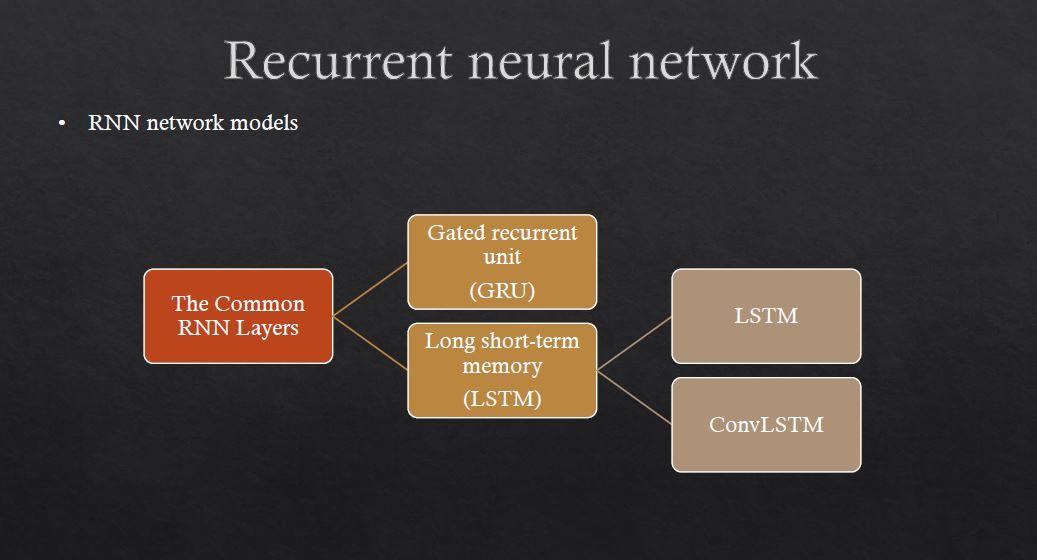

<div dir="rtl" align="right">

مثال  Conv LSTM روی داده‌های ECG

برای شروع از دیتاست آماده‌ی ECG SciPy (همان سیگنال ۵ دقیقه‌ای) استفاده می‌کنیم و یک Conv LSTM برای پیش‌بینی نمونه‌ی بعدی از سیگنال آموزش می‌دهیم.

Samples number: 108000  300.0 Second
Windows: (107900, 100) Goals: (107900,)
Shape for ConvLSTM: (107900, 10, 1, 10, 1)
Train: (86320, 10, 1, 10, 1) Test: (21580, 10, 1, 10, 1)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_lstm2d_2 (ConvLSTM2D)      │ (None, 10, 1, 10, 32)  │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 1, 10, 32)  │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_3 (ConvLSTM2D)      │ (None, 1, 10, 16)      │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1, 10, 16)      │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         5,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,457 (107.25 KB)

 Trainable params: 27,361 (106.88 KB)

 Non-trainable params: 96 (384.00 B)

Epoch 1/12
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - loss: 0.1073 - val_loss: 0.0271
Epoch 2/12
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - loss: 0.0112 - val_loss: 0.0040
Epoch 3/12
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - loss: 0.0057 - val_loss: 0.0067
Epoch 4/12
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - loss: 0.0041 - val_loss: 0.0037
Epoch 5/12
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - loss: 0.0037 - val_loss: 0.0025
Epoch 6/12
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - loss: 0.0035 - val_loss: 0.0028
Epoch 7/12
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - loss: 0.0030 - val_loss: 0.0056
Epoch 8/12
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - loss: 0.0029 - val_loss: 0.0018
Epoch 9/12
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 10/12
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - loss: 0.0029 - val_loss: 0.0023
Epoch 11/12
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 12

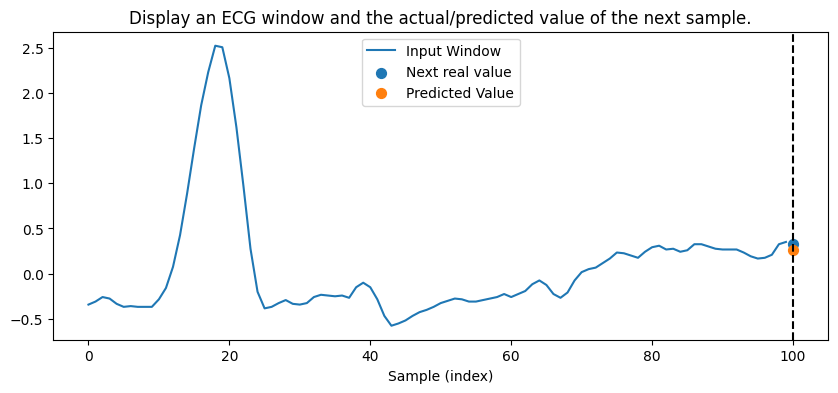

MSE in Test Samples: 0.003537


In [2]:
import numpy as np  # برای محاسبات عددی و کار با آرایه‌ها
import matplotlib.pyplot as plt  # برای رسم نمودارها
from scipy.datasets import electrocardiogram  # برای بارگذاری داده ECG آماده
from tensorflow.keras.models import Sequential  # برای ساخت مدل ترتیبی شبکه عصبی
from tensorflow.keras.layers import ConvLSTM2D, BatchNormalization, Flatten, Dense
# ConvLSTM2D: ترکیب CNN و LSTM برای داده‌های توالی‌ای
# BatchNormalization: نرمال‌سازی لایه‌ها برای آموزش پایدار
# Flatten: صاف کردن آرایه چندبعدی برای اتصال به Dense
# Dense: لایه کاملاً متصل (خروجی)
from tensorflow.keras.optimizers import Adam  # بهینه‌ساز Adam
from sklearn.model_selection import train_test_split  # تقسیم داده‌ها به آموزش و تست

# ---------- پارامترها ----------
FS = 360               # نرخ نمونه‌برداری دیتاست ECG (360 نمونه در ثانیه)
FRAME_SIZE = 10        # تعداد نمونه‌ها در هر فریم
TIME_STEPS = 10        # تعداد فریم‌ها در هر نمونه → طول پنجره = FRAME_SIZE * TIME_STEPS
WINDOW = FRAME_SIZE * TIME_STEPS  # طول کل پنجره
TEST_RATIO = 0.2       # نسبت داده تست
EPOCHS = 12            # تعداد دوره‌های آموزش
BATCH_SIZE = 64        # اندازه دسته‌های داده
# ---------------------------------

# 1) بارگذاری و نرمال‌سازی سیگنال ECG
signal = electrocardiogram()  # بارگذاری سیگنال ECG
signal = (signal - np.mean(signal)) / np.std(signal)  # نرمال‌سازی: میانگین=0، واریانس=1
print("Samples number:", signal.shape[0], " {:.1f} Second".format(signal.shape[0]/FS))
# چاپ تعداد نمونه‌ها و مدت زمان کل سیگنال بر حسب ثانیه

# 2) ساخت پنجره‌ها: X_windows شکل (N_samples, WINDOW)
X_windows = []  # لیست برای نگهداری پنجره‌ها
Y = []          # لیست برای نگهداری هدف‌ها
for i in range(len(signal) - WINDOW):  # حرکت روی کل سیگنال
    X_windows.append(signal[i : i + WINDOW])  # پنجره‌ای از طول WINDOW
    Y.append(signal[i + WINDOW])             # نمونه بعد از پنجره = هدف پیش‌بینی
X_windows = np.array(X_windows)  # تبدیل به آرایه numpy
Y = np.array(Y)
print("Windows:", X_windows.shape, "Goals:", Y.shape)  # چاپ شکل پنجره‌ها و هدف‌ها

# 3) تبدیل هر پنجره به توالی فریم‌ها برای ConvLSTM2D
N = X_windows.shape[0]
X_frames = X_windows.reshape((N, TIME_STEPS, FRAME_SIZE))  # (N_samples, TIME_STEPS, FRAME_SIZE)
X_frames = X_frames[:, :, np.newaxis, :, np.newaxis]      # افزودن بعد rows و channels
# خروجی نهایی: (samples, time_steps, rows, cols, channels)
print("Shape for ConvLSTM:", X_frames.shape)  # چاپ شکل داده برای مدل

# 4) تقسیم به آموزش و تست
X_train, X_test, Y_train, Y_test = train_test_split(
    X_frames, Y, test_size=TEST_RATIO, random_state=42, shuffle=True
)
print("Train:", X_train.shape, "Test:", X_test.shape)  # چاپ شکل داده آموزش و تست

# 5) ساخت مدل ConvLSTM2D
model = Sequential([
    # لایه اول ConvLSTM2D: 32 فیلتر، kernel=(1,3)، conv روی محور cols، بازگشت توالی=True
    ConvLSTM2D(filters=32, kernel_size=(1,3), padding='same', return_sequences=True,
               input_shape=(TIME_STEPS, 1, FRAME_SIZE, 1), activation='tanh'),
    BatchNormalization(),  # نرمال‌سازی
    # لایه دوم ConvLSTM2D: 16 فیلتر، بازگشت توالی=False
    ConvLSTM2D(filters=16, kernel_size=(1,3), padding='same', return_sequences=False, activation='tanh'),
    BatchNormalization(),
    Flatten(),  # صاف کردن خروجی چندبعدی برای اتصال به Dense
    Dense(32, activation='relu'),  # لایه میانی Dense
    Dense(1)   # خروجی عددی: مقدار سیگنال بعدی
])
model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse')  # استفاده از Adam و MSE
model.summary()  # نمایش ساختار مدل

# 6) آموزش مدل
history = model.fit(
    X_train, Y_train, validation_data=(X_test, Y_test),
    epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1
)
# آموزش مدل روی داده‌های آموزش و اعتبارسنجی روی تست

# 7) پیش‌بینی روی مجموعه تست
pred = model.predict(X_test)  # پیش‌بینی مقدار بعدی سیگنال

# 8) رسم بخشی از نتیجه
first_idx = 0  # اولین نمونه از تست
sample_frames = X_test[first_idx].reshape(TIME_STEPS, FRAME_SIZE)  # بازسازی فریم‌ها
reconstructed_window = sample_frames.flatten()  # بازسازی کل پنجره
true_next = Y_test[first_idx]  # مقدار واقعی بعدی
pred_next = pred[first_idx, 0]  # مقدار پیش‌بینی شده

plt.figure(figsize=(10,4))
plt.plot(range(WINDOW), reconstructed_window, label='Input Window')  # پنجره ورودی
plt.axvline(WINDOW, color='k', linestyle='--')  # خط جداکننده نمونه بعدی
plt.scatter([WINDOW], [true_next], label='Next real value', s=50)  # مقدار واقعی
plt.scatter([WINDOW], [pred_next], label='Predicted Value', s=50)  # مقدار پیش‌بینی
plt.legend()
plt.xlabel('Sample (index)')
plt.title('Display an ECG window and the actual/predicted value of the next sample.')
plt.show()  # نمایش نمودار

# 9) گزارش عددی
mse = np.mean((pred.flatten() - Y_test)**2)  # محاسبه MSE روی مجموعه تست
print(f"MSE in Test Samples: {mse:.6f}")  # چاپ MSE
